In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier as OVO
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Reading the data

In [4]:
train = pd.read_csv('salju_train.csv')
test = pd.read_csv('salju_test.csv')

In [5]:
train.head()
# 109.095 rows x 24 columns

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [6]:
train.corr()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
id,1.000000,0.007520,0.004129,0.001892,-0.002019,-0.003793,-0.003330,0.001467,-0.000819,0.002330,0.002229,-0.004429,-0.004715,0.001144,0.000388,0.006948,0.004265
SuhuMin,0.007520,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.004129,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.001892,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,-0.002019,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,-0.003793,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,-0.003330,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.001467,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,-0.000819,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,0.002330,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [8]:
# Define X variable
X_train = train.drop(['id', 'Tanggal', 'KodeLokasi', 'BersaljuHariIni', 'BersaljuBesok'], axis=1)

In [9]:
X_train.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SuhuMin                   107973 non-null  float64
 1   SuhuMax                   108166 non-null  float64
 2   Hujan                     106664 non-null  float64
 3   Penguapan                 62071 non-null   float64
 4   SinarMatahari             56716 non-null   float64
 5   ArahAnginTerkencang       101351 non-null  object 
 6   KecepatanAnginTerkencang  101399 non-null  float64
 7   ArahAngin9am              101172 non-null  object 
 8   ArahAngin3pm              105898 non-null  object 
 9   KecepatanAngin9am         107742 non-null  float64
 10  KecepatanAngin3pm         106792 non-null  float64
 11  Kelembaban9am             107093 non-null  float64
 12  Kelembaban3pm             105721 non-null  float64
 13  Tekanan9am                97768 non-null   f

<AxesSubplot:>

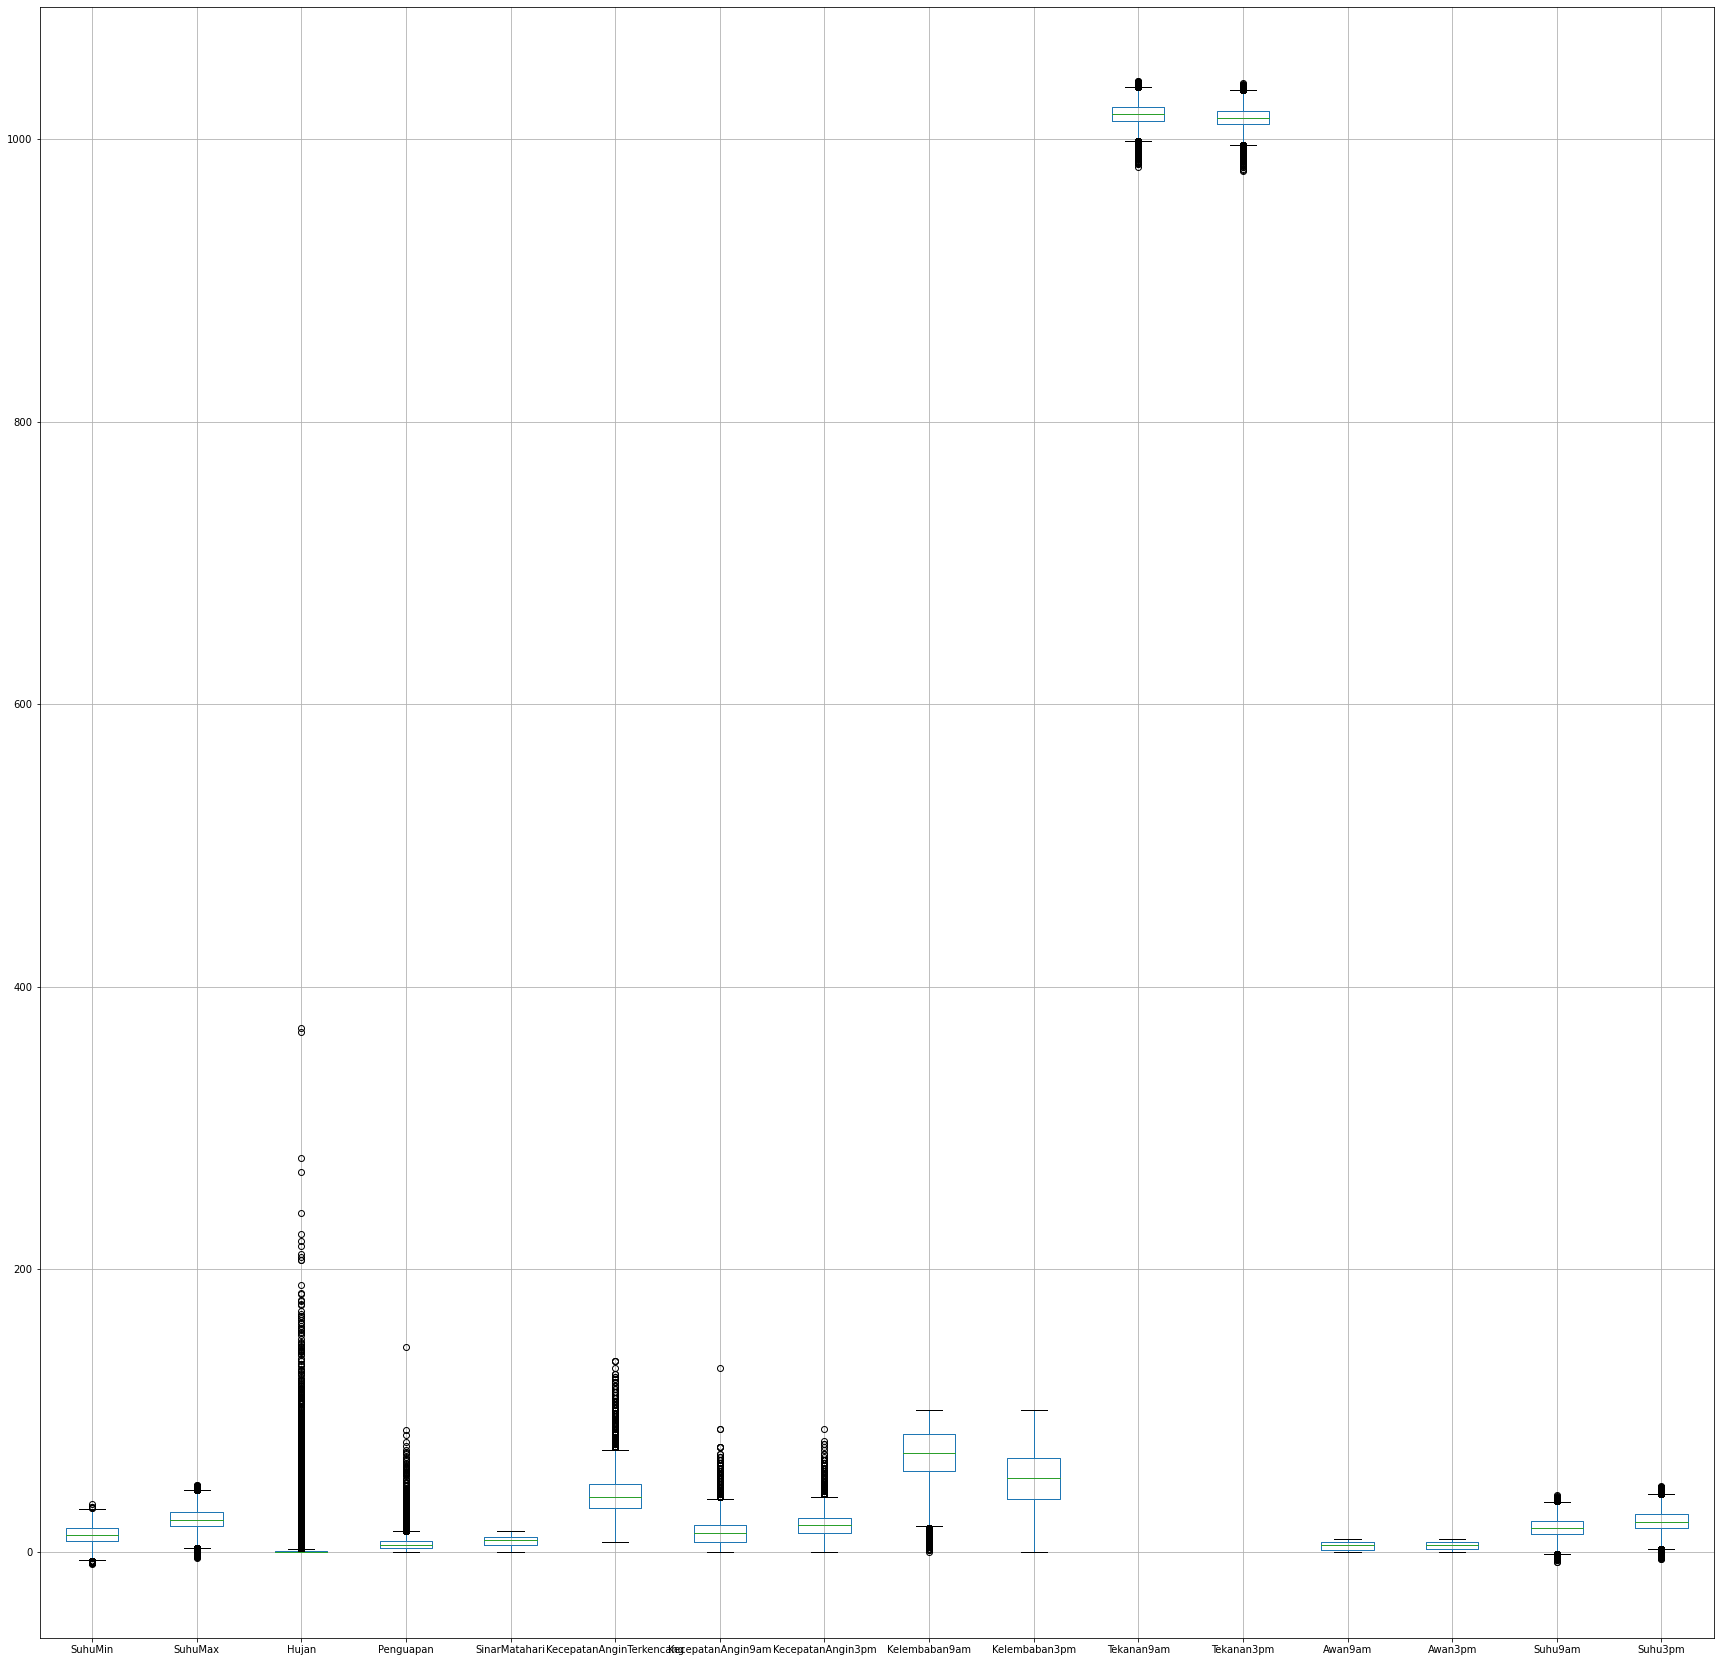

In [11]:
plt.figure(figsize=(30,30))
X_train.boxplot(column=[x for x in X_train.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1).keys()])

# Cleaning the data

Impute the null continues data with regression

In [12]:
# Define the regression imputer
imputer = IterativeImputer(BayesianRidge())

In [13]:
# Function to get imputed data
def regression_imputer():
    X = X_train.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1)
    train_new = imputer.fit_transform(X)
    train_new = pd.DataFrame(data=train_new, columns=X.keys())
    train_new = pd.concat([train_new, X_train[['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']]], axis=1)
    return train_new

In [14]:
X_train_imputed = pd.DataFrame(regression_imputer())

C:\Users\AHNAF BASIL MUBAROK\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [15]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SuhuMin                   109095 non-null  float64
 1   SuhuMax                   109095 non-null  float64
 2   Hujan                     109095 non-null  float64
 3   Penguapan                 109095 non-null  float64
 4   SinarMatahari             109095 non-null  float64
 5   KecepatanAnginTerkencang  109095 non-null  float64
 6   KecepatanAngin9am         109095 non-null  float64
 7   KecepatanAngin3pm         109095 non-null  float64
 8   Kelembaban9am             109095 non-null  float64
 9   Kelembaban3pm             109095 non-null  float64
 10  Tekanan9am                109095 non-null  float64
 11  Tekanan3pm                109095 non-null  float64
 12  Awan9am                   109095 non-null  float64
 13  Awan3pm                   109095 non-null  f

Imput null categorical data with classification 

In [16]:
X_train_imputed['ArahAnginTerkencang'].unique()

array(['WSW', nan, 'ESE', 'SSW', 'N', 'SW', 'WNW', 'W', 'ENE', 'S', 'SE',
       'SSE', 'E', 'NNW', 'NW', 'NE', 'NNE'], dtype=object)

In [17]:
scaler = StandardScaler()

In [18]:
def classification_imputer_terkencang():
    
    X_notnull = X_train_imputed[X_train_imputed['ArahAnginTerkencang'].notnull()]
    y = X_notnull['ArahAnginTerkencang']
    X = X_notnull.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1)
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    logreg = LogisticRegression()
    logreg.fit(Xtrain, ytrain)
    y_imputed = logreg.predict(Xtest)
    
    return(accuracy_score(ytest, y_imputed))

In [19]:
classification_imputer_terkencang()

C:\Users\AHNAF BASIL MUBAROK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.15911333289482338

In [20]:
 #Imputasi kategorikal data menggunakan klasifikasi tidak memungkinkan, karena beberapa model yang dicoba mengalami underfitting.
    # Maka imputasi kategorikal data akan dilakukan dengan mengklaster data tanpa variabel ketegorikal, 
    # karena jumlah mata angin adalah sebanyak 16 
    # ['WSW', nan, 'ESE', 'SSW', 'N', 'SW', 'WNW', 'W', 'ENE', 'S', 'SE','SSE', 'E', 'NNW', 'NW', 'NE', 'NNE'],
    # maka akan dilakukan klaster metode k-means dengan k=16

In [21]:
#Berikut di bawah adalah code clustering k-means tanpa library

In [22]:
def kmeans_scratch(df, k):
    scaler.fit(df)
    df = pd.DataFrame(scaler.transform(df), columns=df.keys())
    X = np.array(df)
    
    #Initialize the centroids randomly
    init_centroids = random.sample(range(0, len(df)), k)
    
    centroids = []
    for i in init_centroids:
        centroids.append(df.loc[i])
    centroids = np.array(centroids)
    
    #Calculate the euclidean distance
    def euclidean_dist(x1, x2):
        dis = (sum(x1-x2)**2)**0.5
        return dis
    
    #Find the closest data to  centroids
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in centroids:
            distance.append(euclidean_dist(i,j))
        assigned_centroid.append(np.argmin(distance))
        
    get_closets_to_centroids = assigned_centroid
    
    #Move the centroids based on the mean of the data points
    new_centroids=[]
    cluster_df = pd.concat([pd.DataFrame(X, columns=df.keys()),X_train_imputed[['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']], pd.DataFrame(get_closets_to_centroids, columns=['cluster'])], axis=1)
    
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    
    return cluster_df, new_centroids

Imputasi kategorikal data dari klasterisasi

In [23]:
cluster_1 = kmeans_scratch(X_train_imputed.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1) , 16)[0]
cluster_1

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,cluster
0,-0.282533,-1.088910,0.282137,-0.848164,-0.940173,-1.170699,-1.581357,-0.646584,0.476753,1.175779,0.350685,0.472303,0.675617,0.513987,-0.596856,-0.965265,WSW,NaN,WSW,1
1,-0.502272,-0.877205,0.658454,-0.669949,-0.000938,0.091132,-0.118255,0.151421,0.582282,0.451637,-0.371252,-0.107669,1.023969,0.212851,-0.782068,-0.893254,NaN,SW,WNW,8
2,0.941725,1.239851,-0.282337,0.815403,0.715364,0.310287,0.106838,0.835424,-0.367478,-0.465609,-0.309189,-0.395824,-0.322675,-0.377524,1.054618,1.137445,ESE,SE,SE,12
3,-0.769097,0.181323,-0.282337,0.893170,0.860384,1.050781,-0.118255,0.037420,-2.319764,-1.672513,0.218084,0.234366,-1.330713,1.060006,-0.257301,0.215709,SSW,N,SW,9
4,-0.988836,-0.411453,-0.282337,-0.400446,1.492020,-0.208058,0.894662,0.037420,-0.736830,-0.175952,0.291751,-0.092798,-0.938266,0.636429,-0.704897,-0.518799,N,NNW,ESE,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,1.239942,0.068413,-0.282337,0.569766,0.429723,0.236238,1.119754,0.835424,0.265695,0.886123,0.232818,0.338464,-0.153372,0.636429,0.776800,0.057286,ESE,SE,ESE,2
109091,0.549335,0.280119,-0.282337,0.313484,0.343473,-0.208058,1.569939,0.037420,-0.895123,0.017152,0.100217,0.130268,-0.425761,-0.178177,1.054618,0.388535,SSE,SSE,E,0
109092,-0.737706,-0.397339,-0.094179,-0.836143,-0.192967,-0.504255,-1.131171,-0.646584,1.215456,-0.031124,-0.474385,-0.702513,0.137608,0.018115,-0.674028,-0.273963,NW,N,NW,4
109093,-0.219751,0.929349,-0.282337,0.731468,1.090070,0.606485,-0.118255,0.835424,-1.792119,-1.624236,0.335951,0.070784,-1.723160,-1.481458,0.730497,1.079837,E,ESE,SE,8


In [24]:
def imput_categorical_data(klaster, arah_angin, arah):
    for i in range(len(cluster_1)):
        if (type(cluster_1[arah_angin][i] ) != str) and (cluster_1['cluster'][i] == klaster):
            cluster_1[arah_angin][i] = arah
        else:
            continue

In [25]:
# code untuk imput null categorical values
for i in range (16):
    
    for j in ['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']:
        
        sum_arah_angin_per_klaster = cluster_1.loc[cluster_1['cluster']==i, :][j].value_counts()
        
        print(sum_arah_angin_per_klaster)
        print('Klaster : ', i)
        
        for ArahAngin in sum_arah_angin_per_klaster.keys():
            if sum_arah_angin_per_klaster[ArahAngin] == np.max(sum_arah_angin_per_klaster):
                terbanyak = ArahAngin
            else:
                continue
        
        imput_categorical_data(i, j, terbanyak)
        
        print('Arah angin terbanyak adalah : ', terbanyak)
        print(' ')
    print(' ')

SE     522
E      499
SSE    493
S      462
ENE    440
ESE    399
NE     377
SSW    375
SW     371
N      355
W      335
NNE    330
WSW    325
WNW    285
NW     270
NNW    223
Name: ArahAnginTerkencang, dtype: int64
Klaster :  0


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
N      513
SE     507
E      490
SSE    486
S      457
SSW    421
ESE    420
ENE    387
SW     371
NNE    359
NW     352
NE     346
W      331
WNW    309
NNW    292
WSW    291
Name: ArahAngin9am, dtype: int64
Klaster :  0


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
SE     631
S      481
ESE    472
E      469
SSE    453
ENE    450
NE     430
WSW    421
SW     381
W      363
N      361
SSW    341
NNE    310
WNW    307
NW     279
NNW    239
Name: ArahAngin3pm, dtype: int64
Klaster :  0


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
W      920
WSW    770
WNW    744
N      738
NW     718
SW     669
NNW    615
SSW    585
S      552
E      509
SSE    458
ENE    433
NNE    421
SE     417
ESE    407
NE     364
Name: ArahAnginTerkencang, dtype: int64
Klaster :  1


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
N      847
W      727
NW     695
NNW    673
WNW    641
NNE    585
SW     576
NE     570
E      531
WSW    502
ENE    470
SE     453
ESE    430
SSE    428
SSW    424
S      421
Name: ArahAngin9am, dtype: int64
Klaster :  1


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
W      877
NW     778
WNW    777
SW     774
WSW    742
N      713
NNW    700
S      607
SSW    574
SE     557
SSE    500
NE     474
E      446
ESE    422
NNE    405
ENE    375
Name: ArahAngin3pm, dtype: int64
Klaster :  1


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
 
SE     797
E      788
ENE    693
SSE    665
S      664
NE     653
N      568
ESE    536
NNE    533
SSW    462
WNW    319
W      301
NW     293
SW     276
WSW    253
NNW    241
Name: ArahAnginTerkencang, dtype: int64
Klaster :  2


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SSE    883
N      786
SE     726
E      669
S      652
NNE    625
ESE    591
ENE    575
SSW    492
NE     471
SW     405
NW     353
NNW    346
W      312
WSW    278
WNW    246
Name: ArahAngin9am, dtype: int64
Klaster :  2


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SSE
 
SE     864
ENE    803
NE     732
E      678
S      647
ESE    645
SSE    643
N      540
NNE    500
WNW    389
W      361
SSW    351
WSW    341
NW     324
NNW    318
SW     277
Name: ArahAngin3pm, dtype: int64
Klaster :  2


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
WSW    240
SE     222
W      217
SW     214
S      214
SSW    212
WNW    205
N      200
SSE    186
E      177
ENE    167
ESE    156
NW     156
NNW    135
NE     126
NNE    119
Name: ArahAnginTerkencang, dtype: int64
Klaster :  3


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  WSW
 
N      237
NW     225
SE     222
W      219
WSW    210
SW     205
E      204
S      199
SSW    180
WNW    175
NNW    172
SSE    170
NNE    167
ENE    159
NE     147
ESE    133
Name: ArahAngin9am, dtype: int64
Klaster :  3


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
WSW    261
S      246
SW     243
SE     235
W      230
SSW    219
SSE    206
NW     195
N      184
WNW    183
ESE    173
E      162
NNW    152
NNE    143
ENE    143
NE     141
Name: ArahAngin3pm, dtype: int64
Klaster :  3


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  WSW
 
 
W      1461
N      1360
NW     1331
WSW    1258
NNW    1248
WNW    1179
SW     1104
E       799
S       747
SSE     746
SSW     743
ENE     727
NNE     712
ESE     680
SE      672
NE      672
Name: ArahAnginTerkencang, dtype: int64
Klaster :  4


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
N      1262
NW     1206
NNW    1094
E       951
WNW     925
W       888
NE      867
NNE     859
ENE     840
SW      819
WSW     742
ESE     702
SE      678
SSW     627
SSE     596
S       576
Name: ArahAngin9am, dtype: int64
Klaster :  4


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
NW     1465
NNW    1436
W      1391
WNW    1365
N      1295
WSW    1150
SW      999
SE      849
S       803
NNE     794
NE      771
SSW     759
SSE     722
E       700
ESE     689
ENE     673
Name: ArahAngin3pm, dtype: int64
Klaster :  4


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  NW
 
 
SE     297
SSE    281
S      233
E      174
ENE    153
ESE    150
N      124
SSW    117
NE     106
WNW     80
NNE     69
NW      60
W       57
SW      50
WSW     48
NNW     37
Name: ArahAnginTerkencang, dtype: int64
Klaster :  5


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SSE    295
S      279
SE     215
N      185
E      167
ESE    159
SSW    122
NNE    118
SW      94
NE      87
ENE     87
WNW     68
NNW     64
W       59
NW      58
WSW     52
Name: ArahAngin9am, dtype: int64
Klaster :  5


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SSE
 
SSE    308
SE     280
S      231
E      164
ENE    146
ESE    142
N      122
NE     121
SSW    109
WNW     89
NW      80
NNE     75
W       75
SW      60
NNW     55
WSW     48
Name: ArahAngin3pm, dtype: int64
Klaster :  5


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SSE
 
 
SSW    484
SW     442
WSW    439
W      432
S      412
SSE    400
SE     391
E      349
ENE    347
N      344
NW     338
WNW    326
ESE    299
NE     269
NNW    255
NNE    255
Name: ArahAnginTerkencang, dtype: int64
Klaster :  6


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SSW
 
N      477
SW     432
S      414
NW     407
SE     395
W      392
SSE    385
SSW    376
WNW    352
NNW    346
WSW    346
E      342
NNE    330
ENE    317
NE     314
ESE    274
Name: ArahAngin9am, dtype: int64
Klaster :  6


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
SW     481
W      476
S      471
WSW    463
SE     432
SSW    422
SSE    400
ESE    357
NW     354
WNW    353
E      337
NE     335
NNW    324
N      323
ENE    298
NNE    245
Name: ArahAngin3pm, dtype: int64
Klaster :  6


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SW
 
 
W      487
S      480
SSE    467
SSW    466
SE     462
SW     453
WSW    427
E      410
N      392
WNW    386
ENE    384
ESE    327
NW     325
NE     298
NNE    283
NNW    242
Name: ArahAnginTerkencang, dtype: int64
Klaster :  7


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
N      480
SE     475
W      466
SW     447
E      442
NW     440
SSW    425
S      424
SSE    421
WNW    381
NE     364
NNW    360
WSW    360
ENE    346
ESE    338
NNE    313
Name: ArahAngin9am, dtype: int64
Klaster :  7


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
SE     548
S      521
SW     499
W      487
SSE    472
SSW    467
WSW    462
ESE    416
NE     376
WNW    374
E      372
N      367
ENE    338
NW     335
NNW    294
NNE    291
Name: ArahAngin3pm, dtype: int64
Klaster :  7


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
W      694
SW     667
WSW    614
WNW    566
SSW    561
SSE    540
S      533
N      525
SE     504
NW     504
E      429
ENE    414
NNW    390
ESE    374
NE     328
NNE    313
Name: ArahAnginTerkencang, dtype: int64
Klaster :  8


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
N      745
W      618
SW     564
NW     560
SE     518
NNW    513
WNW    497
S      486
SSE    470
WSW    461
E      448
SSW    440
NNE    432
ESE    429
ENE    427
NE     387
Name: ArahAngin9am, dtype: int64
Klaster :  8


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
SW     698
WSW    683
W      655
S      601
SE     576
WNW    558
SSW    548
NW     548
SSE    534
N      499
NNW    463
ESE    437
E      433
NE     397
ENE    355
NNE    323
Name: ArahAngin3pm, dtype: int64
Klaster :  8


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SW
 
 
SW     569
W      566
WSW    544
SSW    467
WNW    452
NW     443
N      415
SSE    386
S      371
SE     369
NNW    366
ENE    334
E      317
ESE    288
NNE    269
NE     250
Name: ArahAnginTerkencang, dtype: int64
Klaster :  9


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SW
 
N      555
W      514
NW     467
NNW    449
SW     449
WNW    411
E      394
WSW    381
NNE    380
S      377
ENE    368
SE     356
NE     341
SSE    334
SSW    331
ESE    299
Name: ArahAngin9am, dtype: int64
Klaster :  9


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
W      585
SW     553
WSW    519
WNW    490
S      488
SSW    479
SE     454
NW     435
NNW    409
SSE    409
N      402
E      345
NE     313
ESE    298
ENE    263
NNE    258
Name: ArahAngin3pm, dtype: int64
Klaster :  9


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
 
SE     355
SSE    344
E      339
S      315
W      302
WSW    298
SSW    293
SW     293
ENE    283
ESE    274
NE     257
NW     233
N      229
WNW    225
NNE    202
NNW    151
Name: ArahAnginTerkencang, dtype: int64
Klaster :  10


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SE     369
SW     342
SSE    338
S      327
N      319
E      300
ENE    287
W      274
SSW    273
NW     271
ESE    256
NE     250
WSW    242
NNE    232
NNW    223
WNW    221
Name: ArahAngin9am, dtype: int64
Klaster :  10


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SE     414
S      365
SSE    357
W      338
ESE    331
SW     325
E      305
WSW    287
NE     284
SSW    268
ENE    268
WNW    236
NW     221
N      218
NNE    197
NNW    189
Name: ArahAngin3pm, dtype: int64
Klaster :  10


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
W      722
WSW    670
SW     612
WNW    598
NW     597
N      558
SSW    552
NNW    475
S      460
SSE    458
SE     436
E      386
ENE    374
NNE    354
NE     339
ESE    321
Name: ArahAnginTerkencang, dtype: int64
Klaster :  11


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
N      729
W      591
NW     581
NNW    562
WNW    536
WSW    512
SW     503
NNE    493
NE     458
E      454
SE     419
ENE    405
SSW    404
SSE    401
S      378
ESE    359
Name: ArahAngin9am, dtype: int64
Klaster :  11


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
W      731
SW     655
WSW    654
NW     628
WNW    602
S      560
NNW    537
SSW    519
N      503
SE     494
SSE    490
ESE    435
NNE    400
NE     389
E      375
ENE    313
Name: ArahAngin3pm, dtype: int64
Klaster :  11


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  W
 
 
E      911
SE     810
NE     743
SSE    732
S      729
ENE    723
ESE    653
NNE    573
N      571
SSW    553
WSW    461
W      455
NW     440
SW     433
WNW    398
NNW    341
Name: ArahAnginTerkencang, dtype: int64
Klaster :  12


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  E
 
SE     849
N      827
E      820
SSE    788
S      723
NNE    677
ESE    663
ENE    644
NE     614
SSW    587
NW     529
SW     528
W      475
NNW    462
WSW    431
WNW    379
Name: ArahAngin9am, dtype: int64
Klaster :  12


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SE     965
ESE    833
E      831
NE     799
ENE    796
SSE    768
S      667
N      605
NNE    512
SW     507
WSW    498
W      497
SSW    465
WNW    455
NW     419
NNW    406
Name: ArahAngin3pm, dtype: int64
Klaster :  12


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
E      185
SSW    179
SE     171
SSE    168
SW     167
W      162
S      151
ENE    150
N      144
WSW    128
WNW    119
ESE    118
NNE    118
NW     109
NE     108
NNW     92
Name: ArahAnginTerkencang, dtype: int64
Klaster :  13


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  E
 
N      211
SE     168
E      168
SSE    166
SW     163
S      161
NNE    141
NNW    139
NW     137
ENE    135
WNW    135
SSW    132
W      132
ESE    125
NE     121
WSW    119
Name: ArahAngin9am, dtype: int64
Klaster :  13


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
SE     195
SW     187
W      181
SSE    181
S      179
E      165
WSW    164
NE     154
ESE    150
SSW    141
N      136
ENE    123
NW     118
WNW    117
NNE    103
NNW     96
Name: ArahAngin3pm, dtype: int64
Klaster :  13


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
SE     303
S      252
E      248
SSE    239
ENE    238
NE     194
ESE    179
N      173
NNE    160
SSW    155
WNW     90
WSW     84
NW      80
W       77
SW      65
NNW     60
Name: ArahAnginTerkencang, dtype: int64
Klaster :  14


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SSE    346
N      288
S      254
SE     242
NNE    194
ESE    184
E      178
ENE    161
SSW    157
NE     144
SW     125
NNW    101
WNW     87
NW      84
W       79
WSW     71
Name: ArahAngin9am, dtype: int64
Klaster :  14


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SSE
 
SE     323
ENE    257
S      250
SSE    234
E      213
NE     212
ESE    197
N      164
NNE    163
WNW    156
SSW    108
W       95
NNW     80
NW      80
WSW     79
SW      74
Name: ArahAngin3pm, dtype: int64
Klaster :  14


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 
E      382
S      356
SE     350
SSE    319
W      303
SSW    291
SW     271
ESE    268
WSW    265
ENE    265
N      259
NE     258
WNW    230
NNE    216
NW     190
NNW    154
Name: ArahAnginTerkencang, dtype: int64
Klaster :  15


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  E
 
SE     394
N      359
SSE    322
E      319
ESE    314
SSW    298
S      295
SW     283
ENE    282
WSW    269
W      262
NW     260
NNE    237
NE     232
NNW    222
WNW    209
Name: ArahAngin9am, dtype: int64
Klaster :  15


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
SE     387
S      362
E      350
SSE    338
ESE    336
WSW    304
NE     294
SW     289
W      289
SSW    287
ENE    282
N      246
WNW    231
NNE    211
NNW    207
NW     197
Name: ArahAngin3pm, dtype: int64
Klaster :  15


<ipython-input-24-ec48325db612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  SE
 
 


In [26]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SuhuMin                   109095 non-null  float64
 1   SuhuMax                   109095 non-null  float64
 2   Hujan                     109095 non-null  float64
 3   Penguapan                 109095 non-null  float64
 4   SinarMatahari             109095 non-null  float64
 5   KecepatanAnginTerkencang  109095 non-null  float64
 6   KecepatanAngin9am         109095 non-null  float64
 7   KecepatanAngin3pm         109095 non-null  float64
 8   Kelembaban9am             109095 non-null  float64
 9   Kelembaban3pm             109095 non-null  float64
 10  Tekanan9am                109095 non-null  float64
 11  Tekanan3pm                109095 non-null  float64
 12  Awan9am                   109095 non-null  float64
 13  Awan3pm                   109095 non-null  f

In [27]:
# clean scaled data :
scaled_data = cluster_1

In [28]:
arah_angin_terkencang = pd.get_dummies(scaled_data['ArahAnginTerkencang'],drop_first=True)
arah_angin_9am = pd.get_dummies(scaled_data['ArahAngin9am'],drop_first=True)
arah_angin_3pm = pd.get_dummies(scaled_data['ArahAngin3pm'],drop_first=True)

In [29]:
scaled_data_encoded = pd.concat([scaled_data.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'],axis=1), arah_angin_terkencang, arah_angin_9am, arah_angin_3pm], axis=1)

In [30]:
scaled_data_encoded.columns = ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm', 'cluster', 'ENE_terkencang', 'ESE_terkencang', 'N_terkencang', 'NE_terkencang',
       'NNE_terkencang', 'NNW_terkencang', 'NW_terkencang', 'S_terkencang', 'SE_terkencang', 'SSE_terkencang', 'SSW_terkencang', 'SW_terkencang', 'W_terkencang', 'WNW_terkencang', 'WSW_terkencang',
       'ENE_9am', 'ESE_9am', 'N_9am', 'NE_9am', 'NNE_9am', 'NNW_9am', 'NW_9am', 'S_9am', 'SE_9am', 'SSE_9am', 'SSW_9am',
       'SW_9am', 'W_9am', 'WNW_9am', 'WSW_9am', 'ENE_3pm', 'ESE_3pm', 'N_3pm', 'NE_3pm', 'NNE_3pm', 'NNW_3pm', 'NW_3pm',
       'S_3pm', 'SE_3pm', 'SSE_3pm', 'SSW_3pm', 'SW_3pm', 'W_3pm', 'WNW_3pm', 'WSW_3pm']

In [31]:
scaled_data_encoded.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,...,NNW_3pm,NW_3pm,S_3pm,SE_3pm,SSE_3pm,SSW_3pm,SW_3pm,W_3pm,WNW_3pm,WSW_3pm
0,-0.282533,-1.088910,0.282137,-0.848164,-0.940173,-1.170699,-1.581357,-0.646584,0.476753,1.175779,...,0,0,0,0,0,0,0,0,0,1
1,-0.502272,-0.877205,0.658454,-0.669949,-0.000938,0.091132,-0.118255,0.151421,0.582282,0.451637,...,0,0,0,0,0,0,0,0,1,0
2,0.941725,1.239851,-0.282337,0.815403,0.715364,0.310287,0.106838,0.835424,-0.367478,-0.465609,...,0,0,0,1,0,0,0,0,0,0
3,-0.769097,0.181323,-0.282337,0.893170,0.860384,1.050781,-0.118255,0.037420,-2.319764,-1.672513,...,0,0,0,0,0,0,1,0,0,0
4,-0.988836,-0.411453,-0.282337,-0.400446,1.492020,-0.208058,0.894662,0.037420,-0.736830,-0.175952,...,0,0,0,0,0,0,0,0,0,0


# CLUSTERING

# K-Means

Menentukan jumlah K yang optimal untuk klasterisasi

In [32]:
def determine_K (df): #fungsi untuk menentukan K pada K-Means
    k = range(1,20)
    inertia = []

    for i in k:
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    
    # Plot it    
    plt.plot(k, inertia) 
    plt.xlabel('k value')
    plt.ylabel('inertia sum squared error')

      

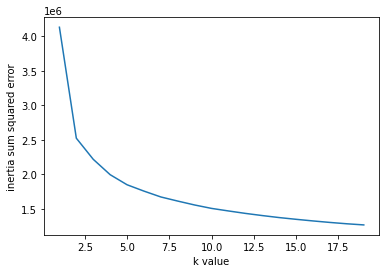

In [33]:
determine_K(scaled_data_encoded)

Dari kurva inersia di atas, dengan menggunakan elbow method, didapat bahwa k optimal adalah 5.

Sekarang bisa dilakukan proses klasterisasi k-means dengan k=5.
Untuk fungsi kmeans sudah dideklarasikan di atas. Agar lebih mudah, maka fungsi kmeansnya dibuat lagi.

alasan saya membuat kembali fungsi kmeans adalah karena fungsi kmeans pertama mengandung SCALER di dalam fungsi, sedangkan dataframe SCALED_DATA sudah terstandarisasi, maka dari itu dibuat KMEANS_SCRATCH_2.

In [34]:
def kmeans_scratch_2(df, k):
    X = np.array(df)
    
    #Initialize the centroids randomly
    init_centroids = random.sample(range(0, len(df)), k)
    
    centroids = []
    for i in init_centroids:
        centroids.append(df.loc[i])
    centroids = np.array(centroids)
    
    #Calculate the euclidean distance
    def euclidean_dist(x1, x2):
        dis = (sum(x1-x2)**2)**0.5
        return dis
    
    #Find the closest data to  centroids
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in centroids:
            distance.append(euclidean_dist(i,j))
        assigned_centroid.append(np.argmin(distance))
        
    get_closets_to_centroids = assigned_centroid
    
    #Move the centroids based on the mean of the data points
    new_centroids=[]
    cluster_df = pd.concat([X_train_imputed.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'],axis=1), scaled_data[['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']], pd.DataFrame(get_closets_to_centroids, columns=['cluster'])], axis=1)
    
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    
    return cluster_df, new_centroids

Saya akan membuat dataframe baru dengan cara menghapus kolom 'cluster' dari data scaled_data.
Kolom 'cluster' dihapus karena tidak akan dibutuhkan dalam perhitungan k-means nanti, kolom 'cluster' tersebut hanyalah 
untuk keperluan memprediksi data yang kosong pada data.

In [35]:
data_ready_to_clustered = scaled_data_encoded.drop(['cluster'], axis=1)

In [36]:
cluster_df = kmeans_scratch_2(df=data_ready_to_clustered, k=5)[0]

In [37]:
cluster_df = pd.concat([train[['Tanggal', 'KodeLokasi', 'BersaljuHariIni', 'BersaljuBesok']], cluster_df], axis=1)

In [38]:
cluster_df.head()

,Tanggal,KodeLokasi,BersaljuHariIni,BersaljuBesok,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,...,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,cluster
0,01/06/2014,C4,Ya,Tidak,10.4,15.5,4.8,1.938730,4.128629,24.000000,...,1020.10000,1018.500000,6.112358,5.710934,13.1,15.0,WSW,N,WSW,0
1,15/07/2014,C10,Ya,Ya,9.0,17.0,8.0,2.600000,7.400000,41.040419,...,1015.20000,1014.600000,7.000000,5.000000,11.9,15.5,W,SW,WNW,4
2,16/02/2011,C46,Tidak,Tidak,18.2,32.0,0.0,8.111442,9.894893,44.000000,...,1015.62124,1012.662317,3.568597,3.606215,23.8,29.6,ESE,SE,SE,2
3,08/08/2012,C36,Tidak,Tidak,7.3,24.5,0.0,8.400000,10.400000,54.000000,...,1019.20000,1016.900000,1.000000,7.000000,15.3,23.2,SSW,N,SW,1
4,29/10/2016,C7,Tidak,Tidak,5.9,20.3,0.0,3.600000,12.600000,37.000000,...,1019.70000,1014.700000,2.000000,6.000000,12.4,18.1,N,NNW,ESE,1


In [39]:
cluster_0 = cluster_df.loc[cluster_df['cluster'] == 0]
cluster_0.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.0
mean,8.222786,20.135740,1.024202,3.587217,7.342661,35.136787,11.125218,15.340541,70.151286,49.281656,1019.359995,1016.770519,3.876683,4.176451,13.427777,18.907231,0.0
std,3.685228,5.376009,2.917479,2.361028,3.379355,11.460460,6.974075,6.936866,18.369563,19.098791,6.905119,6.784874,2.513996,2.328575,4.269088,5.391865,0.0
min,-6.000000,-2.500000,-3.750624,-2.960810,-1.679143,9.000000,0.000000,0.000000,2.000000,1.000000,987.400000,984.400000,-2.448394,0.000000,-3.795874,-3.200000,0.0
25%,5.700000,16.300000,0.000000,1.800000,4.935669,28.000000,6.000000,11.000000,57.000000,36.000000,1015.800000,1013.000000,1.577684,2.214935,10.600000,15.100000,0.0
50%,8.200000,19.700000,0.000000,3.338389,7.787999,33.000000,11.000000,15.000000,71.000000,48.213479,1019.474336,1017.000000,3.861688,4.000000,13.300000,18.600000,0.0
75%,10.700000,23.800000,0.400000,5.000000,9.999275,41.000000,15.000000,19.255799,84.110522,61.485992,1023.700000,1020.900000,6.000000,6.000000,16.200000,22.539617,0.0
max,22.600000,37.800000,38.800000,20.200000,15.726914,111.000000,43.000000,56.000000,109.209757,100.000000,1039.500000,1036.700000,9.038429,10.211991,31.100000,37.500000,0.0


In [50]:
cluster_1 = cluster_df.loc[cluster_df['cluster'] == 1]
cluster_1.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,13667.00000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.000000,13667.0
mean,9.78129,21.366662,1.198223,4.144970,7.452477,36.973878,12.093256,16.647493,69.145857,49.617635,1018.881019,1016.408629,4.090343,4.249471,14.804279,20.032153,1.0
std,3.81976,5.802497,3.349411,2.524667,3.459305,11.487220,7.312455,7.054083,18.723184,19.775755,6.836677,6.766536,2.510154,2.329121,4.473992,5.796526,0.0
min,-4.70000,-1.700000,-4.229295,-2.818582,-3.176074,9.000000,0.000000,0.000000,5.000000,1.000000,989.500000,982.900000,-1.925874,0.000000,-3.300000,-3.200000,1.0
25%,7.20000,17.200000,0.000000,2.205935,5.000000,30.000000,7.000000,11.000000,57.000000,35.000000,1015.100000,1012.400000,2.000000,2.331227,11.700000,15.900000,1.0
50%,9.70000,20.900000,0.000000,3.953833,7.765189,35.000000,11.000000,17.000000,70.000000,50.000000,1018.880329,1016.333537,4.000000,4.131273,14.700000,19.500000,1.0
75%,12.40000,25.300000,0.400000,5.716398,10.200000,43.000000,17.000000,20.000000,83.000000,63.000000,1023.100000,1020.600000,6.224149,6.000000,17.700000,23.900000,1.0
max,24.20000,41.800000,50.800000,24.000000,15.587183,107.000000,50.000000,56.000000,111.386941,100.000000,1040.600000,1038.900000,9.243318,9.856945,32.100000,38.900000,1.0


In [51]:
cluster_2 = cluster_df.loc[cluster_df['cluster'] == 2]
cluster_2.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.000000,43734.0
mean,17.125938,26.946079,4.263686,6.882723,7.381233,45.758759,17.915081,22.891760,67.462199,54.541686,1015.877971,1013.666592,5.019650,4.974049,21.383575,25.102646,2.0
std,4.849307,6.659852,12.556190,4.246812,3.612316,13.284117,9.357834,8.906275,19.037892,21.944744,6.189481,6.316675,2.437976,2.304791,5.412825,6.660673,0.0
min,-3.700000,-2.200000,-3.410876,-1.627498,-3.563671,9.000000,0.000000,0.000000,-93.036898,-72.236249,980.500000,979.000000,-2.403811,-3.816632,-2.900000,-3.800000,2.0
25%,13.800000,22.100000,0.000000,4.400000,4.743502,37.000000,11.000000,17.000000,57.000000,39.023761,1011.900000,1009.400000,3.000000,3.000000,17.600000,20.300000,2.0
50%,17.300000,26.900000,0.000000,6.242523,7.562212,44.000000,17.000000,22.000000,69.000000,57.000000,1015.800000,1013.500000,5.658298,5.204302,21.500000,24.900000,2.0
75%,20.600000,31.800000,2.600000,8.400000,10.376682,53.500400,24.000000,28.000000,81.000000,70.000000,1019.600000,1017.500000,7.000000,7.000000,25.300000,29.900000,2.0
max,33.900000,47.300000,371.000000,145.000000,22.061849,137.495539,130.000000,87.000000,114.028528,100.000000,1041.000000,1038.500000,10.618841,12.167517,40.200000,46.700000,2.0


In [52]:
cluster_3 = cluster_df.loc[cluster_df['cluster'] == 3]
cluster_3.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000,21142.0
mean,5.014891,17.704492,0.734660,2.559960,7.238505,31.250528,8.752744,12.741539,72.760964,48.992615,1019.990851,1017.222762,3.506316,3.898898,10.487145,16.655639,3.0
std,4.105799,5.167256,2.432081,2.149971,3.164608,11.309551,6.531466,6.591655,18.864583,18.661025,7.113347,6.917921,2.493087,2.323434,4.592112,5.218132,0.0
min,-10.287167,-4.800000,-4.698146,-4.786630,-2.888413,7.000000,-2.122839,0.000000,1.000000,1.000000,982.200000,977.100000,-2.257887,0.000000,-7.200000,-5.400000,3.0
25%,2.200000,14.500000,0.000000,1.139221,5.200000,24.000000,4.000000,7.000000,60.000000,36.000000,1016.700000,1013.800000,1.000000,2.000000,7.600000,13.400000,3.0
50%,5.100000,17.550000,0.000000,2.360439,7.800000,30.000000,7.000000,13.000000,74.000000,47.000000,1020.684226,1017.900000,3.267406,3.804750,10.500000,16.600000,3.0
75%,7.900000,20.900000,0.200000,3.802405,9.677359,37.000000,13.000000,17.000000,88.000000,60.000000,1024.174247,1021.300000,5.501705,5.873539,13.500000,19.900000,3.0
max,19.900000,38.500000,73.400000,19.000000,15.434341,113.000000,44.000000,46.000000,112.933121,100.757714,1040.500000,1039.600000,9.626811,9.873095,27.900000,37.500000,3.0


In [53]:
cluster_4 = cluster_df.loc[cluster_df['cluster'] == 4]
cluster_4.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.000000,23013.0
mean,12.179385,23.294669,1.556648,5.041395,7.587141,39.582450,13.695013,18.393590,67.835202,50.553723,1017.906643,1015.611422,4.355204,4.394232,16.970913,21.783870,4.0
std,4.116493,6.341596,4.118253,2.806564,3.550157,11.990673,7.848542,7.517070,18.683430,20.480136,6.544180,6.504255,2.520246,2.351374,4.854894,6.337058,0.0
min,-5.200000,-2.400000,-5.430151,-3.120416,-2.418959,7.000000,0.000000,0.000000,1.000000,-2.559723,984.600000,984.200000,-1.988170,0.000000,-5.200000,-3.500000,4.0
25%,9.300000,18.600000,0.000000,3.000000,5.000000,31.000000,7.000000,13.000000,56.000000,36.000000,1014.000000,1011.700000,2.000000,2.458731,13.500000,17.100000,4.0
50%,12.200000,23.000000,0.000000,4.800000,7.837074,37.701042,13.000000,18.750749,68.964504,51.000000,1017.800000,1015.400000,4.503241,4.466343,16.900000,21.400000,4.0
75%,15.000000,27.800000,0.800000,6.674795,10.458596,46.000000,19.000000,22.000000,81.000000,64.000000,1021.800000,1019.700000,7.000000,6.367877,20.200000,26.200000,4.0
max,26.600000,43.400000,76.200000,24.800000,16.093186,120.000000,61.000000,63.000000,107.860873,100.000000,1040.900000,1038.200000,9.603732,10.643478,35.500000,42.400000,4.0
